#  Import Libraries

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

# Load Dataset

In [2]:
# import the dataset
wine_df = pd.read_csv("wine-clustering.csv")
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Exploratory Data Analysis

In [3]:
wine_df.shape

(178, 13)

In [4]:
# information about the data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


**Visualization of dataset**

In [5]:
# Again check for null values
wine_df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
# check duplicate entries in the dataset
wine_df.duplicated().sum()

0

In [7]:
wine_df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

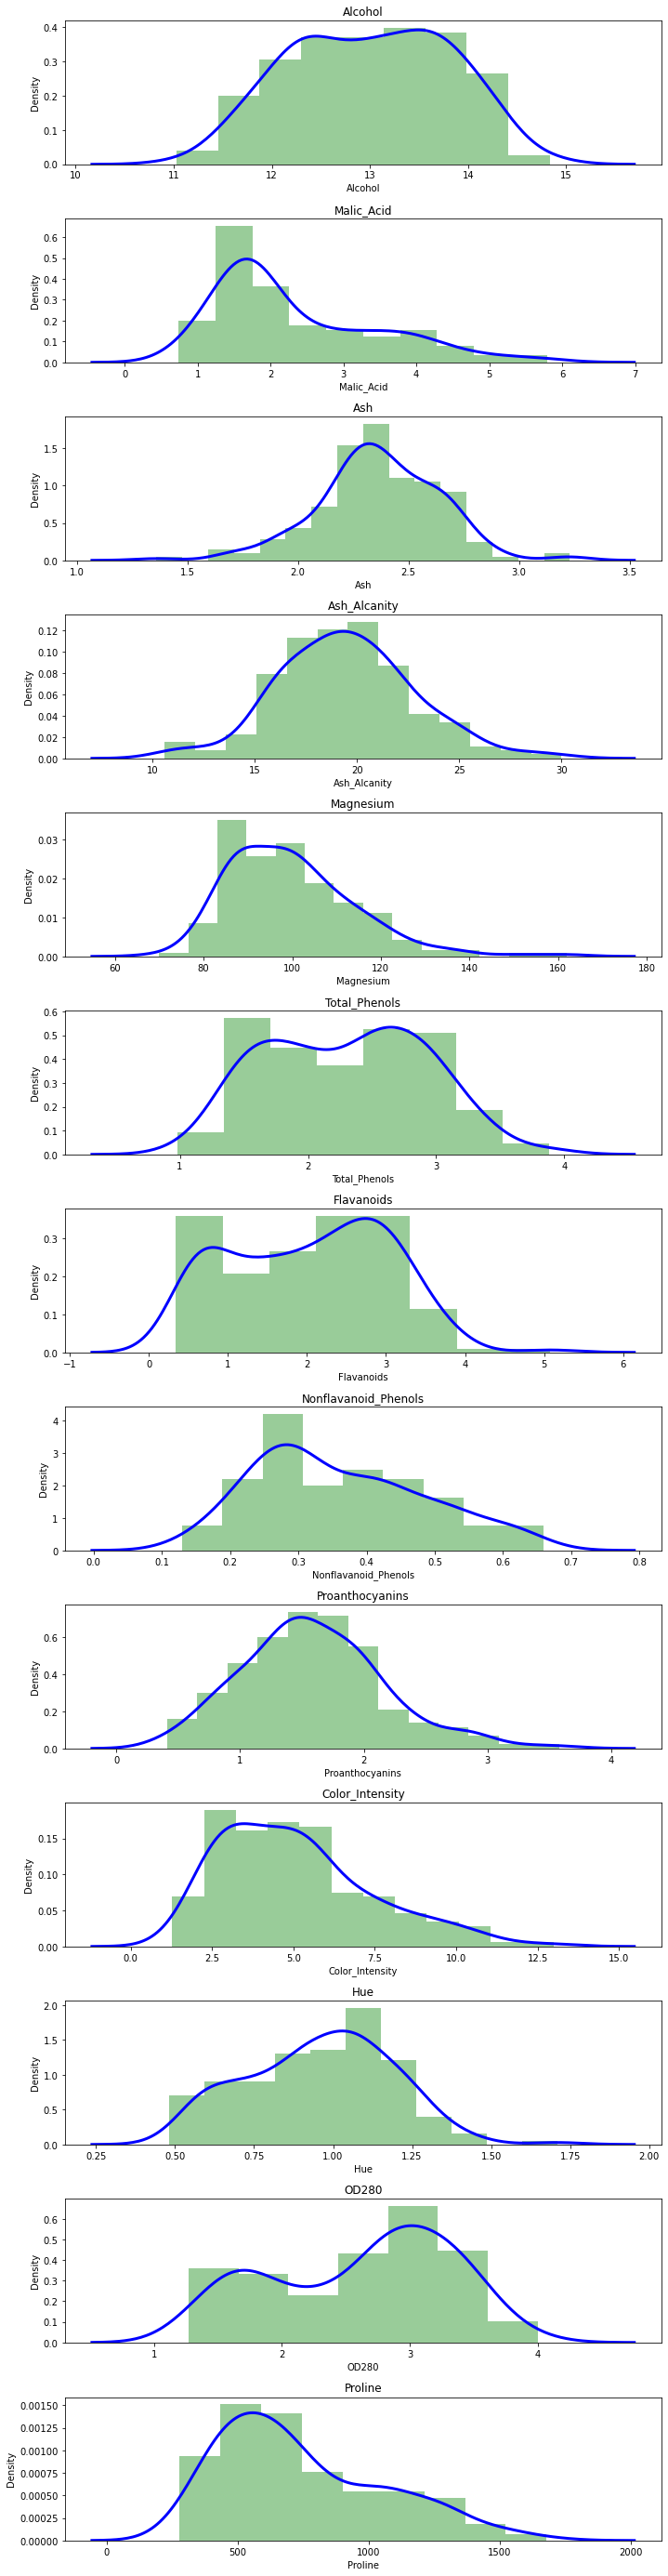

In [9]:
# visualise probability density of all columns
plt.figure(figsize=(10,50))
for i in range(len(wine_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(wine_df[wine_df.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
    plt.title(wine_df.columns[i])
plt.tight_layout()
# This is to ignore warning
import warnings
warnings.filterwarnings('ignore')

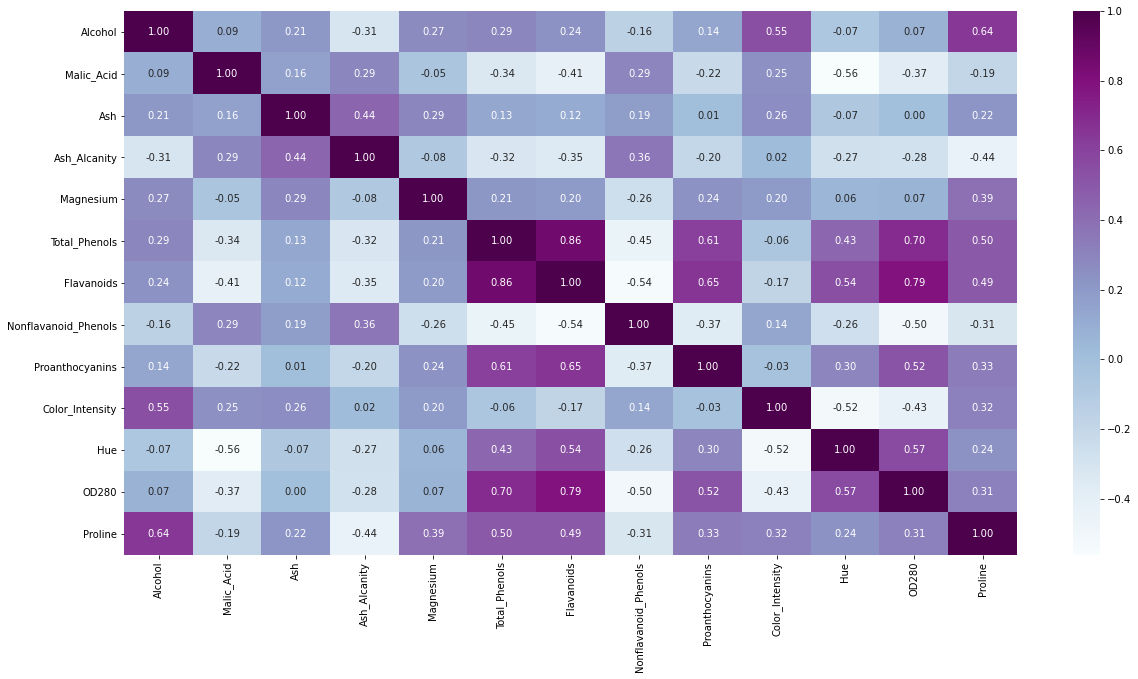

In [10]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corn=wine_df.corr()
sns.heatmap(corn,annot=True,cmap="BuPu",fmt='.2f')

In [11]:
# scale the DataFrame
scalar=StandardScaler()
wine_scaled_df = scalar.fit_transform(wine_df)

# Dimensionality reduction

In [12]:
# convert the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(wine_scaled_df)
pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


#  Hyperparameter tuning

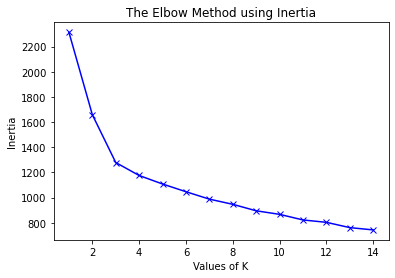

In [13]:
# find 'k' value by Elbow Method
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(wine_scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [14]:
# Spectral clustering
def train_spectral(k,X):
    spectral_model = SpectralClustering(n_clusters=k)
    y_pred = spectral_model.fit_predict(X)
    print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

# Agglomerative clustering
def train_Agglomerative(linkage,k,X):
    agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
    y_pred = agglo_model.fit_predict(X)
    print("Agglomerative Clustering : clusters : ",k," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )

# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
    GaussianMixture_model = GaussianMixture(n_components=k)
    y_pred = GaussianMixture_model.fit_predict(X)
    print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )


In [15]:
# Spectral clustering
clusters=[3,4,5,6]
for i in clusters:
    train_spectral(i,wine_scaled_df)

Spectral Clustering : clusters :  3  silhouette_score :  0.24855292006311666
Spectral Clustering : clusters :  4  silhouette_score :  0.222195038860563
Spectral Clustering : clusters :  5  silhouette_score :  0.2655977273868595
Spectral Clustering : clusters :  6  silhouette_score :  0.19467588409729092


In [16]:
# Agglomerative clustering
clusters=[3,4,5,6]
linkage=['ward', 'complete', 'average', 'single']
for lin in linkage:
    for i in clusters:
        train_Agglomerative(lin,i,wine_scaled_df)

Agglomerative Clustering : clusters :  3  linkage :  ward  silhouette_score :  0.2774439826952265
Agglomerative Clustering : clusters :  4  linkage :  ward  silhouette_score :  0.225836659334758
Agglomerative Clustering : clusters :  5  linkage :  ward  silhouette_score :  0.18674235566758707
Agglomerative Clustering : clusters :  6  linkage :  ward  silhouette_score :  0.17966642854438503
Agglomerative Clustering : clusters :  3  linkage :  complete  silhouette_score :  0.20378689690677748
Agglomerative Clustering : clusters :  4  linkage :  complete  silhouette_score :  0.19382526203175696
Agglomerative Clustering : clusters :  5  linkage :  complete  silhouette_score :  0.18836501623937577
Agglomerative Clustering : clusters :  6  linkage :  complete  silhouette_score :  0.1754908860501433
Agglomerative Clustering : clusters :  3  linkage :  average  silhouette_score :  0.15752526243774145
Agglomerative Clustering : clusters :  4  linkage :  average  silhouette_score :  0.1490031823

In [17]:
# GaussianMixture Model based clustering
clusters=[3,4,5,6]
for i in clusters:
    train_GaussianMixture(i,wine_scaled_df)

GaussianMixture Model based Clustering : clusters :  3  silhouette_score :  0.2848589191898987
GaussianMixture Model based Clustering : clusters :  4  silhouette_score :  0.2761634437150431
GaussianMixture Model based Clustering : clusters :  5  silhouette_score :  0.22630656035598565
GaussianMixture Model based Clustering : clusters :  6  silhouette_score :  0.19320516176779387


#  Model Building

## **a) K-Means Clustering**

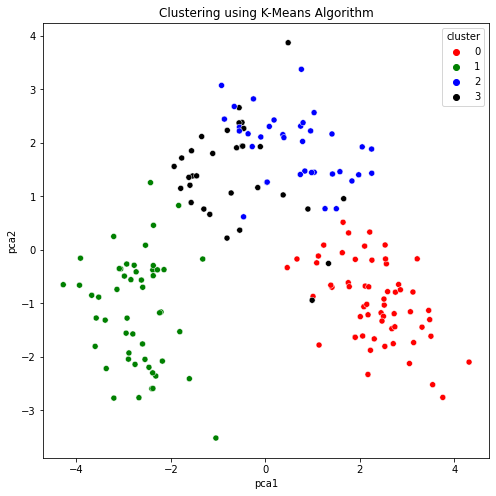

In [18]:
# apply kmeans algorithm
kmeans_model=KMeans(4)
kmeans_model.fit_predict(wine_scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)


# visualize the clustered dataframe
# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

## **b) Agglomerative Clustering**

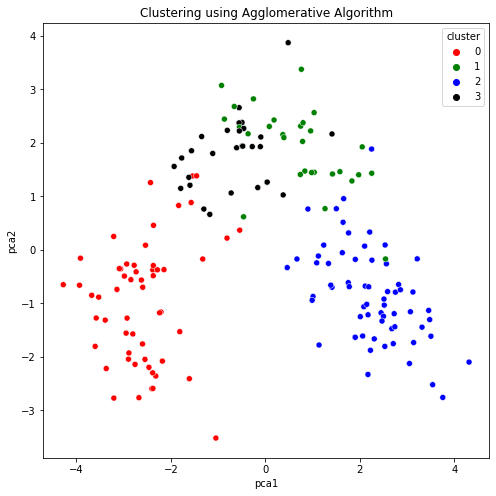

In [19]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=4)
y_pred = agglo_model.fit_predict(wine_scaled_df)
pca_df_aglo= pd.concat([pca_df,pd.DataFrame({'cluster':agglo_model.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_aglo,palette=['red','green','blue','black'])
plt.title("Clustering using Agglomerative Algorithm")
plt.show()

## **c) Spectral Clustering**

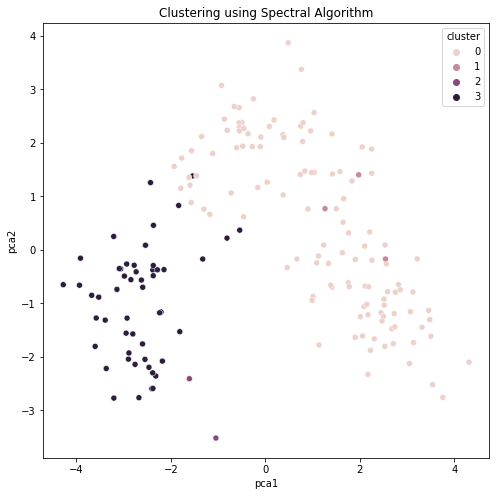

In [20]:
spectral_model = SpectralClustering(n_clusters=4)
y_pred = spectral_model.fit_predict(wine_scaled_df)
pca_df_spl= pd.concat([pca_df,pd.DataFrame({'cluster':spectral_model.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl)
plt.title("Clustering using Spectral Algorithm")
plt.show()

## **d) GaussianMixture Model based clustering**

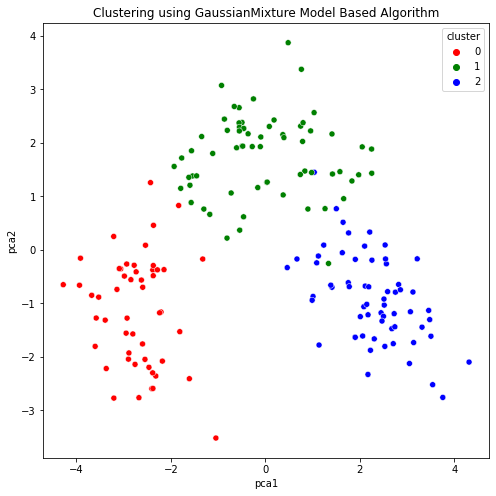

In [21]:
GaussianMixture_model = GaussianMixture(n_components=3)
y_pred = GaussianMixture_model.fit_predict(wine_scaled_df)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue'])
plt.title("Clustering using GaussianMixture Model Based Algorithm")
plt.show()

## **e) DBSCAN Clustering**

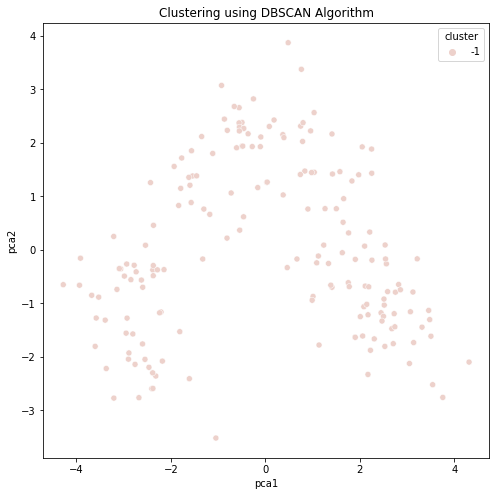

In [22]:
model_dbscan = DBSCAN(eps=1, min_samples=18)
y_pred = model_dbscan.fit_predict(wine_scaled_df)
pca_df_dbscan= pd.concat([pca_df,pd.DataFrame({'cluster':model_dbscan.labels_})],axis=1)

# Scatter Plot
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_dbscan)
plt.title("Clustering using DBSCAN Algorithm")
plt.show()

## **8.1. Find Best Clustering Technique**

Here we saw that all the datapoints are clstered nicely with very less errors by using k-means clustering as compared to other clustering algorithms. So we'll use K-Means model for clustering in this dataset.

In [23]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[wine_df.columns])
# inverse transfor the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[wine_df.columns])
cluster_centers

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.733559,2.004576,2.446780,17.181356,107.677966,2.853220,2.979661,0.286271,1.932373,5.505763,1.064746,3.161864,1116.932203
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,12.277778,1.850833,2.061111,18.441667,92.527778,2.436944,2.257778,0.286944,1.778611,3.108056,1.047222,2.948333,521.916667
3,12.249688,1.946875,2.480625,22.162500,94.937500,2.080625,1.949062,0.441875,1.459375,2.957500,1.081750,2.676875,521.468750


In [24]:
# create a column as "cluster" & store the respective cluster name that they belongs to
wine_cluster_df = pd.concat([wine_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
wine_cluster_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


## Analysis of each Cluster

### Cluster - 1

In [25]:
cluster_1_df = wine_cluster_df[wine_cluster_df["cluster"]==0]
cluster_1_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


### Cluster - 2

In [26]:
cluster_2_df = wine_cluster_df[wine_cluster_df["cluster"]==1]
cluster_2_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,1
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372,1
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630,1
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,1


### Cluster - 3 (Silver)

In [27]:
cluster_3_df = wine_cluster_df[wine_cluster_df["cluster"]==2]
cluster_3_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,2
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,2
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,2


### Cluster - 4

In [28]:
cluster_4_df = wine_cluster_df[wine_cluster_df["cluster"] == 3]
cluster_4_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,3
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,3
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,3
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,3
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,3


#  Save The Model**

In [29]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [30]:
# save the dataframe in .csv file named as "Clustered_Costumer_Data"
wine_cluster_df.to_csv("Clustered_Data.csv")